In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive (10)\Churn_Modelling.csv")

In [76]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [80]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [81]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [82]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [83]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [84]:
X = df.drop(columns='Exited',axis=1)
y = df['Exited']

In [85]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [86]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [87]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [88]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [99]:
history = model.fit(x_train_sc,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 0.3211 - val_accuracy: 0.8512 - val_loss: 0.3443
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.3214 - val_accuracy: 0.8556 - val_loss: 0.3457
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8653 - loss: 0.3216 - val_accuracy: 0.8525 - val_loss: 0.3441
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.3209 - val_accuracy: 0.8500 - val_loss: 0.3476
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.3211 - val_accuracy: 0.8525 - val_loss: 0.3443
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3209 - val_accuracy: 0.8519 - val_loss: 0.3468
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3212 - val_accuracy: 0.8531 - val_loss: 0.3462
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3211 - val_accu

In [92]:
model.layers[0].get_weights()

[array([[ 0.33593503, -0.25515738,  0.38799018,  0.04801743,  0.11246694,
         -0.02456008, -0.12811418,  0.0060662 ,  0.11306857, -0.00199011,
          0.08168194],
        [ 0.06240429,  0.8333925 ,  0.0781926 , -0.45683056,  0.49653378,
          1.2023752 , -0.4077588 , -0.78672975,  0.51649076,  0.7086885 ,
         -0.955788  ],
        [ 0.23304562, -0.20138662, -0.40951487, -0.36605063,  0.01286898,
         -0.14464416,  0.23384048,  0.7019731 ,  0.14854933,  0.23143561,
         -0.16682704],
        [-1.137536  , -0.05806995,  0.74644744, -0.05975797, -0.14205123,
          0.01326056, -0.6477375 ,  0.33104384, -0.6165609 , -0.14670767,
          0.06504383],
        [-0.10744105, -0.62903225, -0.6092804 ,  0.3683265 ,  0.9367231 ,
          1.0718961 ,  0.28185955,  0.50511634, -0.8156458 ,  0.0380673 ,
         -0.00696526],
        [ 0.18039557, -0.3505152 ,  0.7074342 , -0.23183501, -0.05668232,
          0.26004243,  0.28624943,  0.14826119, -0.09908327,  0.0404173

In [93]:
model.layers[1].get_weights()

[array([[ 0.1810169 ,  0.16582258,  0.21741465,  0.28036854,  0.2515547 ,
         -0.0944863 ,  0.17490679, -0.1611612 ,  0.48282063, -0.5957513 ,
          0.15292421],
        [ 0.10522509,  0.2873046 , -0.09593027, -0.06627462,  0.42529422,
          0.484466  ,  0.09435576, -0.1742978 ,  0.545387  , -0.49018526,
         -0.21522984],
        [ 0.0553592 , -0.46206102,  0.06009812,  0.29778844,  0.80075324,
          0.3386983 , -0.37467554,  0.11721773, -0.14366718, -0.6974443 ,
          0.17244351],
        [ 0.4460663 ,  0.32230383,  0.25629643,  0.20412531, -0.50853425,
          0.51914406, -0.16197191,  0.31688565, -0.21844094,  0.3185057 ,
          0.23834917],
        [ 0.08852553, -0.6444226 ,  0.09437735, -0.20550326,  0.15315516,
         -0.299072  , -0.17220289, -0.16375697, -0.58726424,  0.916092  ,
          0.23728745],
        [-0.16920315,  0.6543229 ,  0.4847628 ,  0.4851425 ,  0.18033272,
         -1.0602093 , -0.31937084, -0.32658583, -0.5503485 ,  1.0671804

In [94]:
model.layers[2].get_weights()

[array([[-0.39187697],
        [-0.75909   ],
        [-0.24626336],
        [-0.32710993],
        [ 0.6868073 ],
        [ 0.49421942],
        [-0.5723488 ],
        [-0.5164259 ],
        [ 1.198615  ],
        [ 1.2885076 ],
        [-0.8692388 ]], dtype=float32),
 array([-0.27928856], dtype=float32)]

In [95]:
y_log = model.predict(x_test_sc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [96]:
y_pred=np.where(y_log>0.5,1,0)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [98]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.862
[[1514   71]
 [ 205  210]]


In [100]:
history.history

{'accuracy': [0.866406261920929,
  0.8657812476158142,
  0.8653125166893005,
  0.8657812476158142,
  0.8667187690734863,
  0.8651562333106995,
  0.8648437261581421,
  0.8665624856948853,
  0.8646875023841858,
  0.8656250238418579,
  0.8667187690734863,
  0.8665624856948853,
  0.8668749928474426,
  0.8656250238418579,
  0.8676562309265137,
  0.8665624856948853,
  0.8667187690734863,
  0.867968738079071,
  0.8668749928474426,
  0.8667187690734863,
  0.866406261920929,
  0.8668749928474426,
  0.8660937547683716,
  0.8684375286102295,
  0.8659374713897705,
  0.8673437237739563,
  0.8673437237739563,
  0.8665624856948853,
  0.8676562309265137,
  0.8671875,
  0.8665624856948853,
  0.8659374713897705,
  0.8665624856948853,
  0.8671875,
  0.8648437261581421,
  0.8682812452316284,
  0.8673437237739563,
  0.8681250214576721,
  0.8671875,
  0.8675000071525574,
  0.8662499785423279,
  0.8681250214576721,
  0.8671875,
  0.8690624833106995,
  0.8670312762260437,
  0.8668749928474426,
  0.8671875,
  

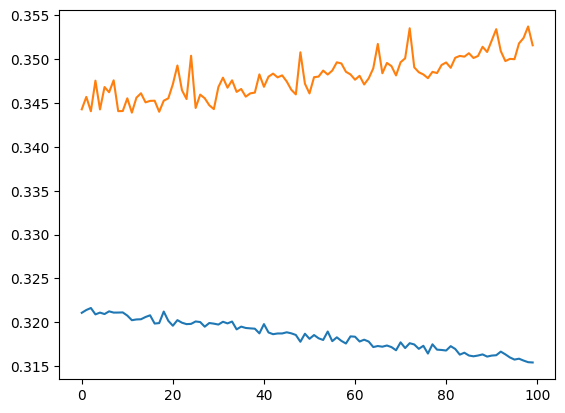

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])